In [19]:
install.packages('Rborist')

package 'Rborist' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\35846\AppData\Local\Temp\RtmpIT1jKc\downloaded_packages


In [20]:
library(caTools, warn.conflicts = FALSE)   # for splitting data into training and test set
library(ranger,warn.conflicts = FALSE)  # for faster implementaion of random forests
library(caret, warn.conflicts = FALSE)     # for classification and regression training
library(data.table, warn.conflicts = FALSE) # for converting data frame to table for faster execution
library(pROC, warn.conflicts = FALSE) # for plotting ROC curve
library(rpart, warn.conflicts = FALSE) # for regression trees
library(rpart.plot, warn.conflicts = FALSE) # for plotting decision tree
library(neuralnet, warn.conflicts = FALSE) #for neural network
library(gbm, quietly=TRUE, warn.conflicts = FALSE)
library(ggplot2, warn.conflicts = FALSE)  # for basic plot
library(plyr, warn.conflicts = FALSE)
library(dplyr, warn.conflicts = FALSE)  # for data manipulation
library(corrplot, warn.conflicts = FALSE)  # for plotting corelation plot between elements
library(glmnet, warn.conflicts = FALSE)
library(Rtsne, warn.conflicts = FALSE)  # for plotting tsne model
library(xgboost, warn.conflicts = FALSE) # # for xgboost model
library(ROSE, warn.conflicts = FALSE)  # for rose sampling
library(Rborist, warn.conflicts = FALSE) 

Rborist 0.3-2

Type RboristNews() to see new features/changes/bug fixes.



In [2]:
crdata <- read.csv("creditcard.csv")

In [ ]:
head(crdata,5)

#### Data Exploration

In [25]:
names(crdata) #column names

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [26]:
str(crdata) # glance at the structure of the data set. last column class categorical column( other column numerical column)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [27]:
dim(crdata) #rows and columns

[1] 284807     31

In [28]:
summary(crdata)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139321   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

In [29]:
sum(is.na(crdata)) #null value checking

[1] 0

In [30]:
table(crdata$Class) # get the distribution of fraud and legit transaction in dataset


     0      1 
284315    492 

In [31]:
prop.table(table(crdata$Class)) #percentage of the fraud and legit transaction


          0           1 
0.998272514 0.001727486 

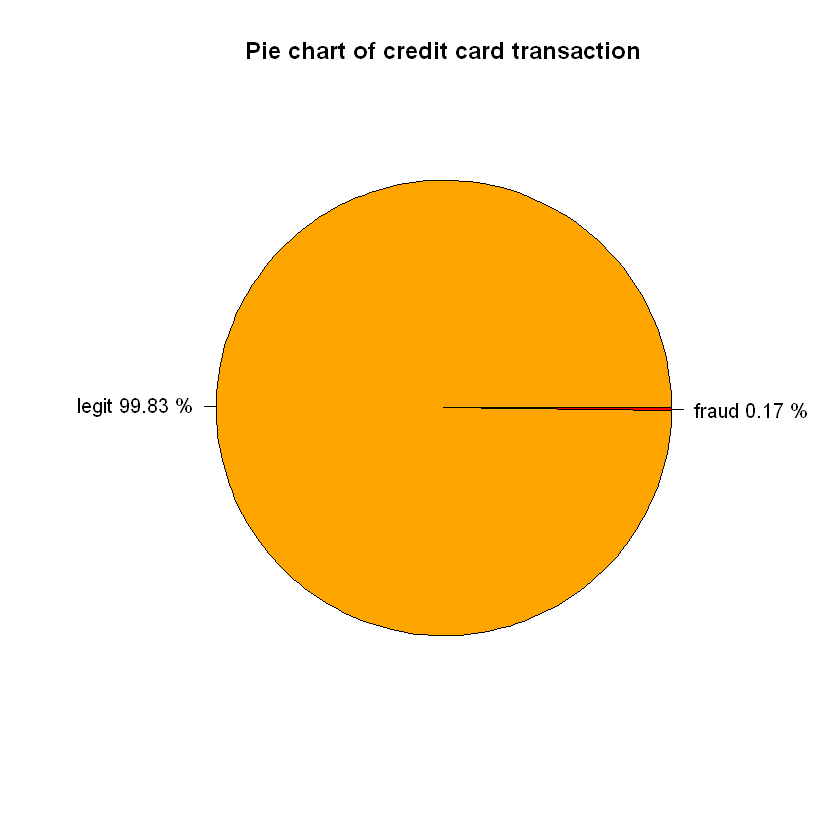

In [32]:
#pie chart of credit card transaction

labels <- c("legit", "fraud")
labels <- paste(labels, round(100*(prop.table(table(crdata$Class))), 2)) # paste for concatenate and c for combine,2 for to round the percentage for 2 digit
labels <- paste(labels, "%")

pie((table(crdata$Class)), labels, col = c("orange","red"),
    main = "Pie chart of credit card transaction") #title

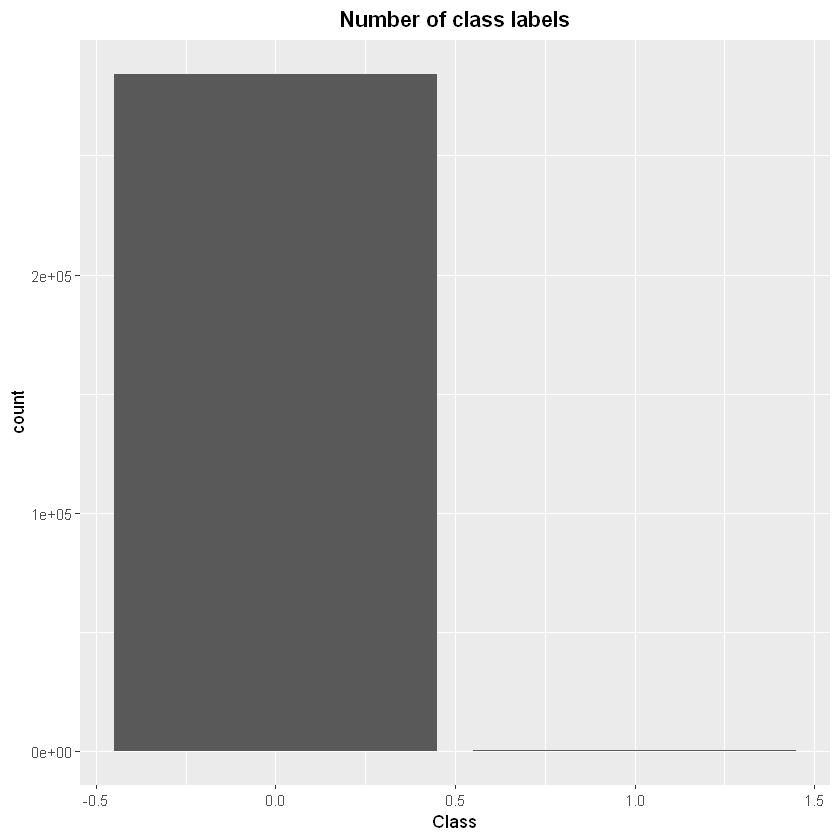

In [33]:
common_theme <- theme(plot.title = element_text(hjust = 0.5, face = "bold"))
ggplot(crdata, aes(x = Class)) + geom_bar() + ggtitle("Number of class labels") + common_theme


###### Clearly, the dataset is extremely unbalanced. Even a “null” classifier which always predicts class=0 would obtain over 99% accuracy on this task. This demonstrates that a simple measure of mean accuracy should not be used due to insensitivity to false negatives.


####  checking the corelation between all the variables and amount and class and see if there are any variables that corelate with each other.

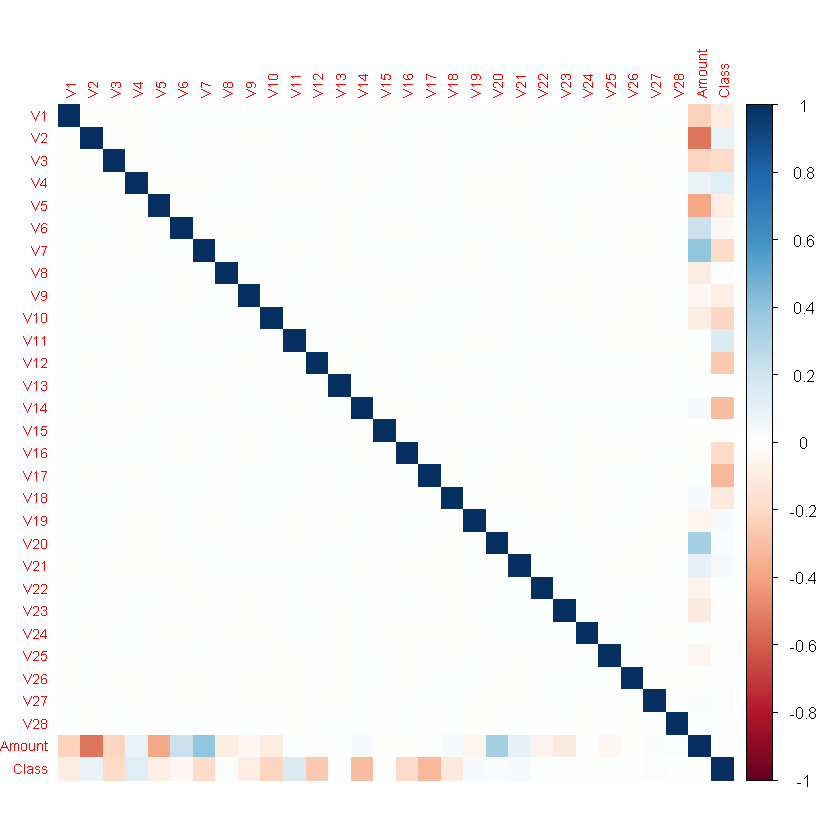

In [34]:
# correlation of anonymous variables with amount and class
correlation <- cor(crdata[, -1], method = "pearson")
corrplot(correlation, number.cex = 1, method = "color", type = "full", tl.cex=0.7, tl.col="red")

**Most of the features are not corelated.In fact, all the anonymous variables are independent to each other.**

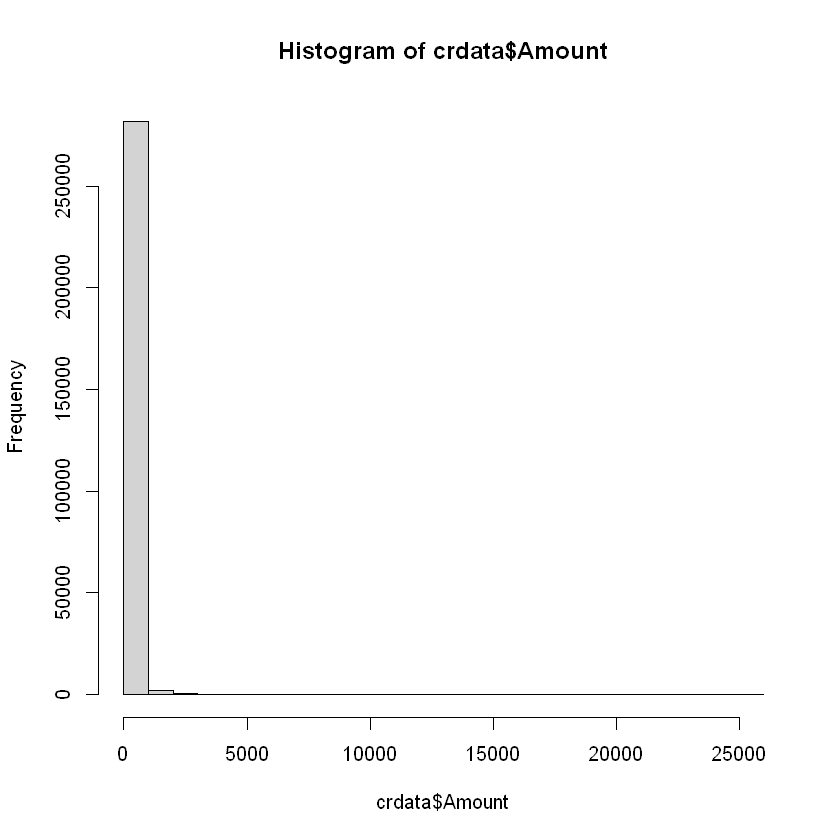

In [35]:
hist(crdata$Amount)

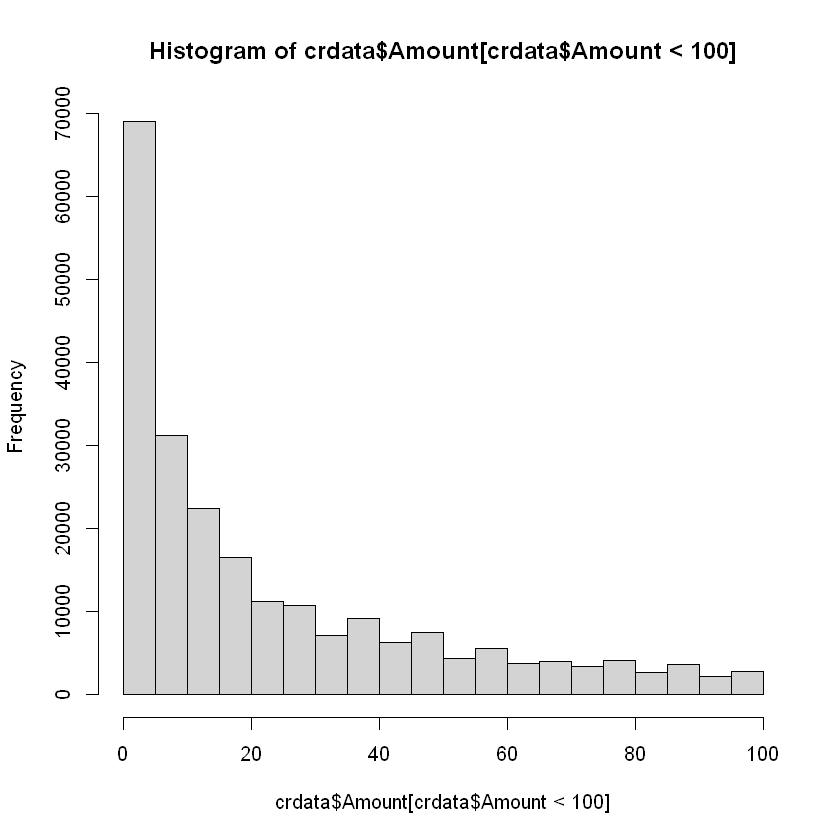

In [36]:
hist(crdata$Amount[crdata$Amount < 100])

In [37]:
summary(crdata$Amount)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.60    22.00    88.35    77.17 25691.16 

In [38]:
var(crdata$Amount) #var: Variance and standard deviation of complex vectors

[1] 62560.07

In [39]:
sd(crdata$Amount)

[1] 250.1201

In [40]:
crdata %>% group_by(Class) %>% summarise(mean(Amount), median(Amount))

Class,mean(Amount),median(Amount)
<int>,<dbl>,<dbl>
0,88.29102,22.00
1,122.21132,9.25


**fraudulent transactions seem to have higher mean value than non-fraudulent ones, meaning that this feature would likely be useful to use in the predictive model.**

In [ ]:
 Data Preprocessing

In [41]:
# scaling the data using standardization and remove the first column (time) from the data set
crdata$Amount <- scale(crdata$Amount)

In [42]:
# scaling the data using standardization and remove the first column (time) from the data set
#crdata$Amount <- scale(crdata$Amount)
df <- crdata[, -c(1)]
head(df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>",<int>
1,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,0.24496383,0
2,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,-0.34247394,0
3,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,1.16068389,0
4,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,0.14053401,0
5,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,-0.07340321,0
6,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,-0.33855582,0


In [4]:
# change 'Class' variable to factor

df$Class <- as.factor(df$Class)
levels(df$Class) <- c("Not Fraud", "Fraud")

In [43]:
str(df)

'data.frame':	284807 obs. of  30 variables:
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V18   : num  0.0258 -0.1834 -0.1214 1.965

#### Data modeling

In [6]:
# split the data into training set and test set
set.seed(101)
split <- sample.split(df$Class, SplitRatio = 0.8)
train_data <- subset(df, split == TRUE)
test_data <- subset(df, split == FALSE)


In [7]:
dim(train_data)

[1] 227846     30

In [8]:
dim(test_data)

[1] 56961    30

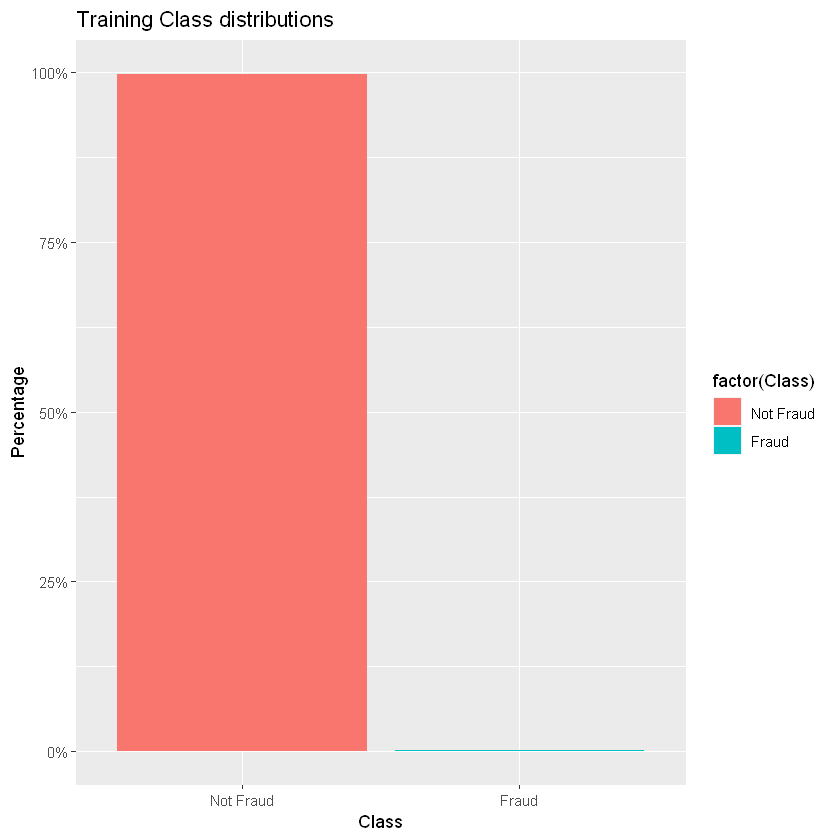

In [44]:
# visualize the training data
train_data %>% ggplot(aes(x = factor(Class), y = prop.table(after_stat(count)), fill = factor(Class))) +
  geom_bar(position = "dodge") +
  scale_y_continuous(labels = scales::percent) +
  labs(x = 'Class', y = 'Percentage', title = 'Training Class distributions') +
  theme_grey()

**Since the data is heavily unbalanced with 99% of non-fraudulent data, this may result in our model perfoming less accurately and being heavily baised towards non-fraudulent transactions. So, We sample the data using ROSE (Random over sampling examples), Over sampling or Down sampling method, and examine the area under ROC curve at each sampling methods**

#### Sampling Techniques

#### Up Sampling

In [53]:
set.seed(90)
up_trdata <- upSample(x = train_data[, -30],
                         y = train_data$Class)
table(up_trdata$Class)  


Not Fraud     Fraud 
   227452    227452 

#### Down Sampling

In [46]:
set.seed(90)
down_trdata <- downSample(x = train_data[, -30],
                         y = train_data$Class)
table(down_trdata$Class)  


Not Fraud     Fraud 
      394       394 

#### Rose Sampling

In [47]:
set.seed(9560)
rose_trdata <- ROSE(Class ~ ., data  = train_data)$data 

table(rose_trdata$Class) 


Not Fraud     Fraud 
   114081    113765 

##### Logistic Regression

In [48]:
# fitting the logistic model
logistic_model <- glm(Class ~ ., down_trdata, family='binomial')

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [49]:
summary(logistic_model)


Call:
glm(formula = Class ~ ., family = "binomial", data = down_trdata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9751  -0.1495   0.0000   0.0000   2.8872  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -22.1978    10.3118  -2.153  0.03135 * 
V1            -1.4050     4.9949  -0.281  0.77849   
V2            38.1657    16.5913   2.300  0.02143 * 
V3           -23.0958    12.8639  -1.795  0.07259 . 
V4            16.5600     8.4753   1.954  0.05071 . 
V5            -6.1526     7.5379  -0.816  0.41437   
V6           -17.5137     7.6765  -2.281  0.02252 * 
V7           -64.9911    29.1111  -2.233  0.02558 * 
V8            11.9842     5.4448   2.201  0.02773 * 
V9           -21.6678    10.6605  -2.033  0.04210 * 
V10          -50.0094    24.5796  -2.035  0.04189 * 
V11           39.0282    19.0878   2.045  0.04089 * 
V12          -70.7328    34.2875  -2.063  0.03912 * 
V13           -1.0988     0.6986  -1.573  0.11575   
V14

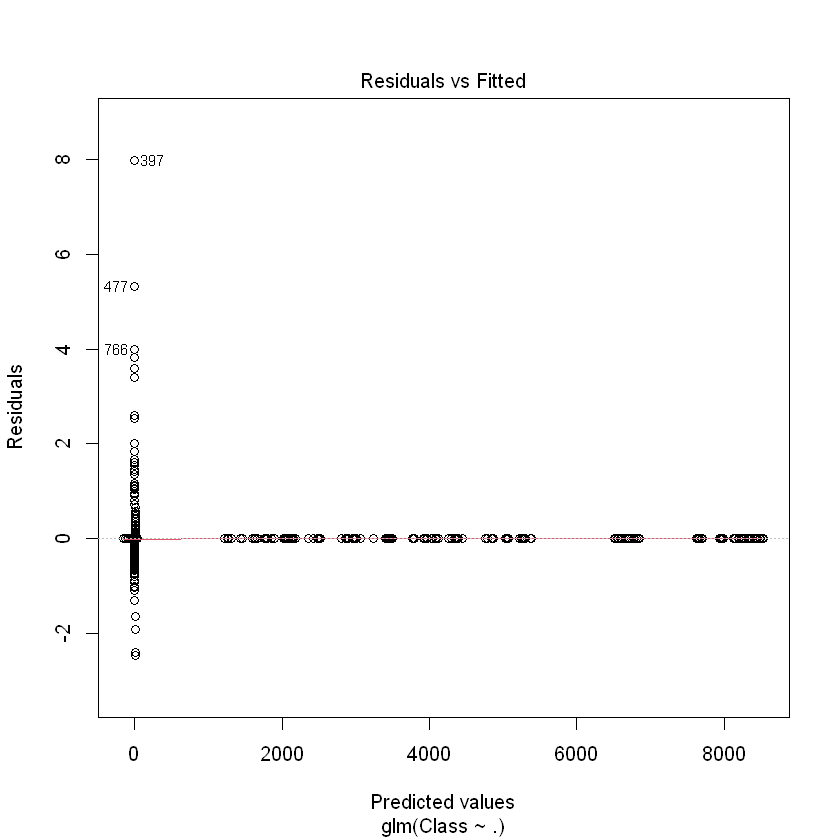

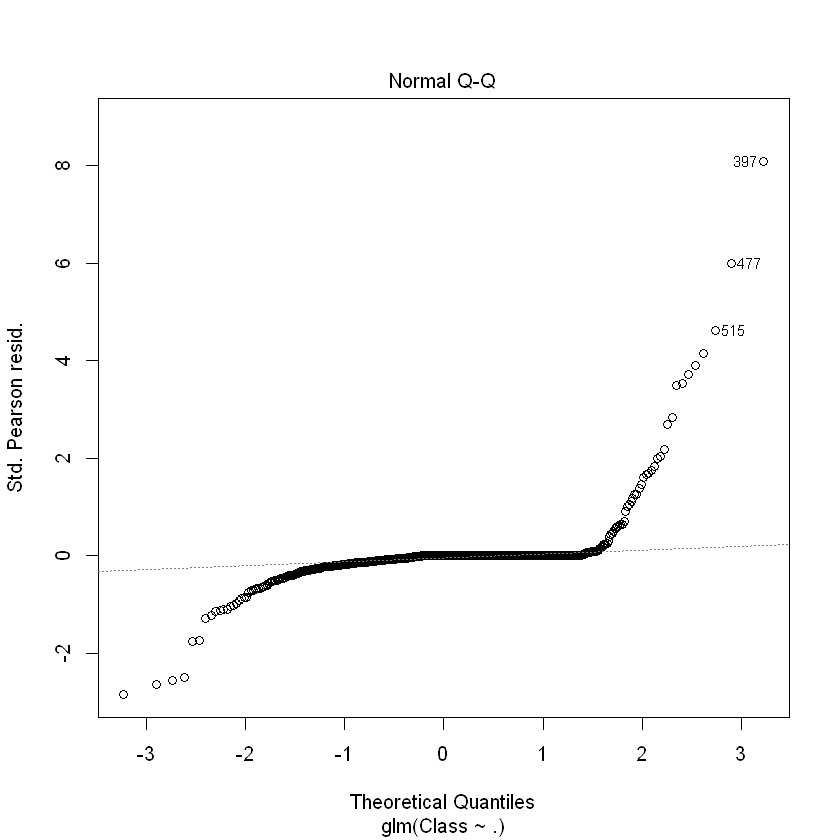

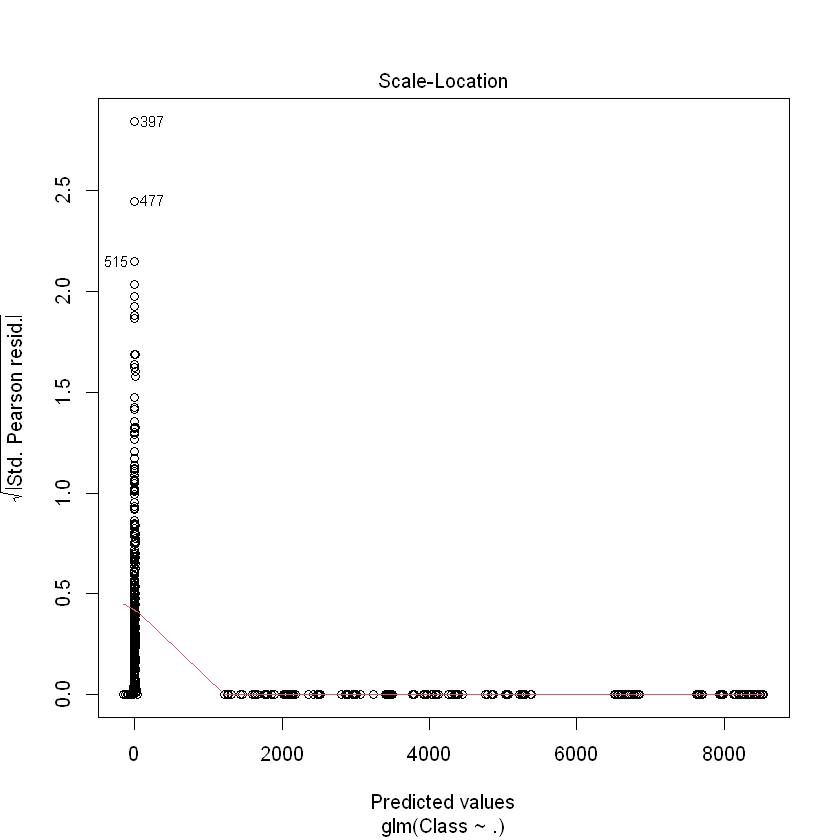

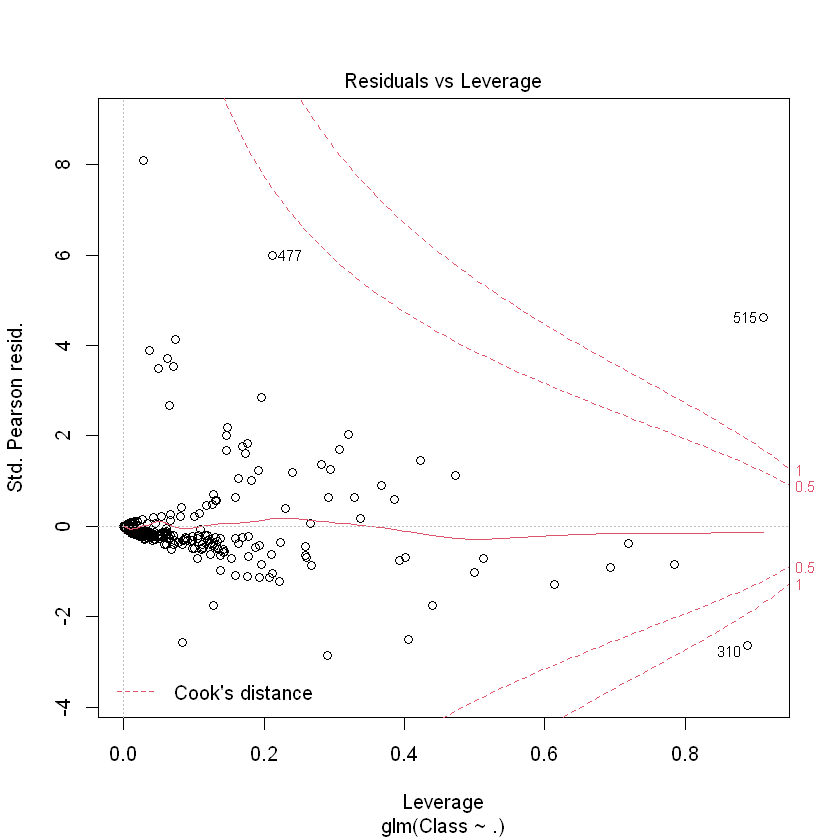

In [50]:
plot(logistic_model)

Area under the curve (AUC): 0.964

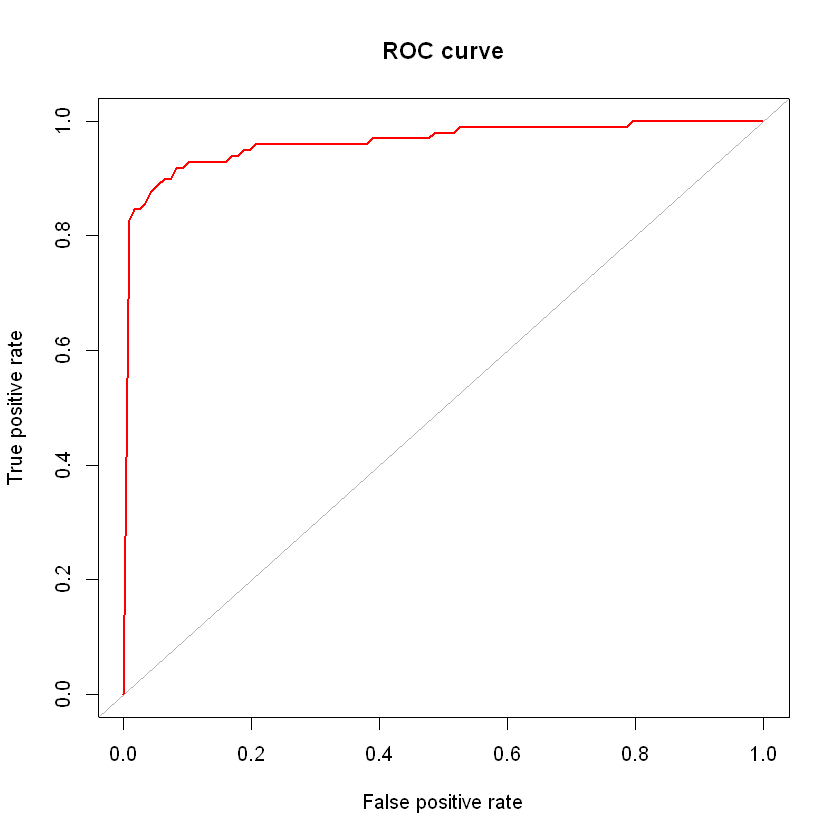

In [51]:
logistic_predictions <- predict(logistic_model, test_data, type='response')
roc.curve(test_data$Class, logistic_predictions, plotit = TRUE, col = "red")

In [58]:
# fitting the logistic model with up_trdata
logistic_model_up <- glm(Class ~ ., up_trdata, family='binomial')

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [60]:
summary(logistic_model_up)


Call:
glm(formula = Class ~ ., family = "binomial", data = up_trdata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.2481   0.0000   0.0001   3.0203  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -4.0672888  0.0244713 -166.207  < 2e-16 ***
V1           0.4408539  0.0131476   33.531  < 2e-16 ***
V2           0.3938606  0.0169766   23.200  < 2e-16 ***
V3           0.3421982  0.0102078   33.523  < 2e-16 ***
V4           0.7379421  0.0068578  107.607  < 2e-16 ***
V5           0.4750111  0.0148032   32.088  < 2e-16 ***
V6          -0.4990349  0.0116505  -42.834  < 2e-16 ***
V7          -0.4841068  0.0177118  -27.332  < 2e-16 ***
V8          -0.4060490  0.0074620  -54.416  < 2e-16 ***
V9          -0.2411867  0.0105956  -22.763  < 2e-16 ***
V10         -0.5625998  0.0137339  -40.964  < 2e-16 ***
V11          0.5022961  0.0097965   51.273  < 2e-16 ***
V12         -0.9238305  0.0133431  -69.237  < 2e-16 ***
V13         -0.3

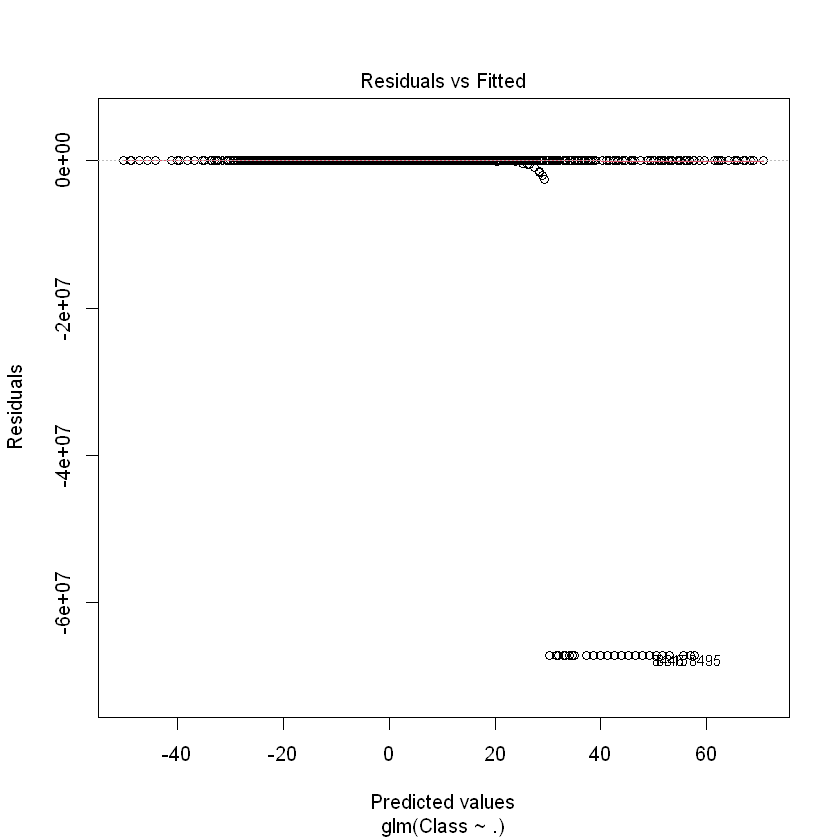

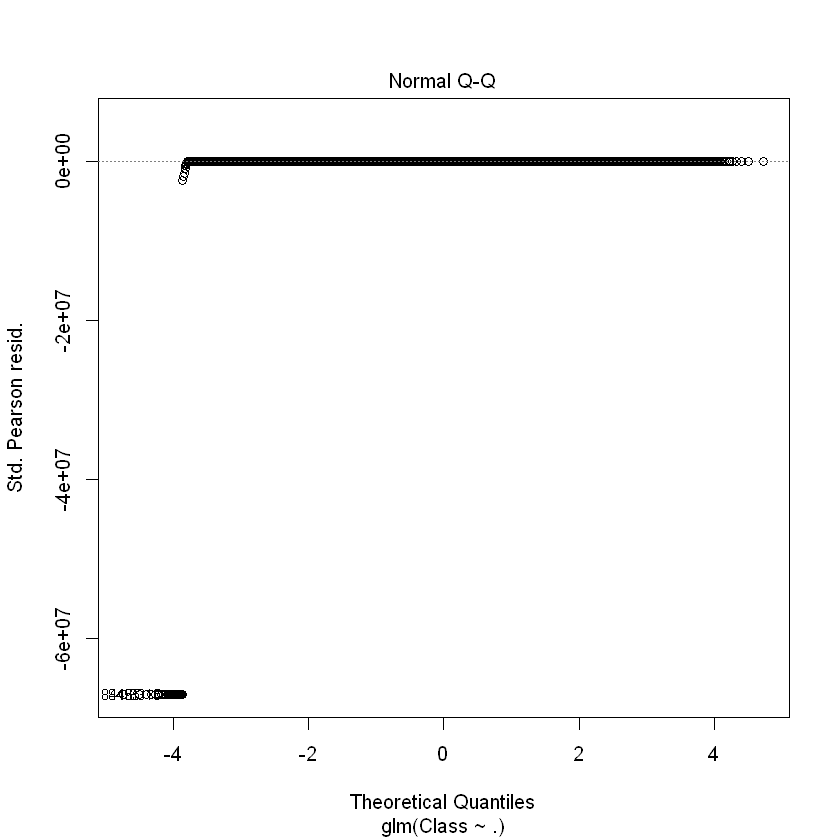

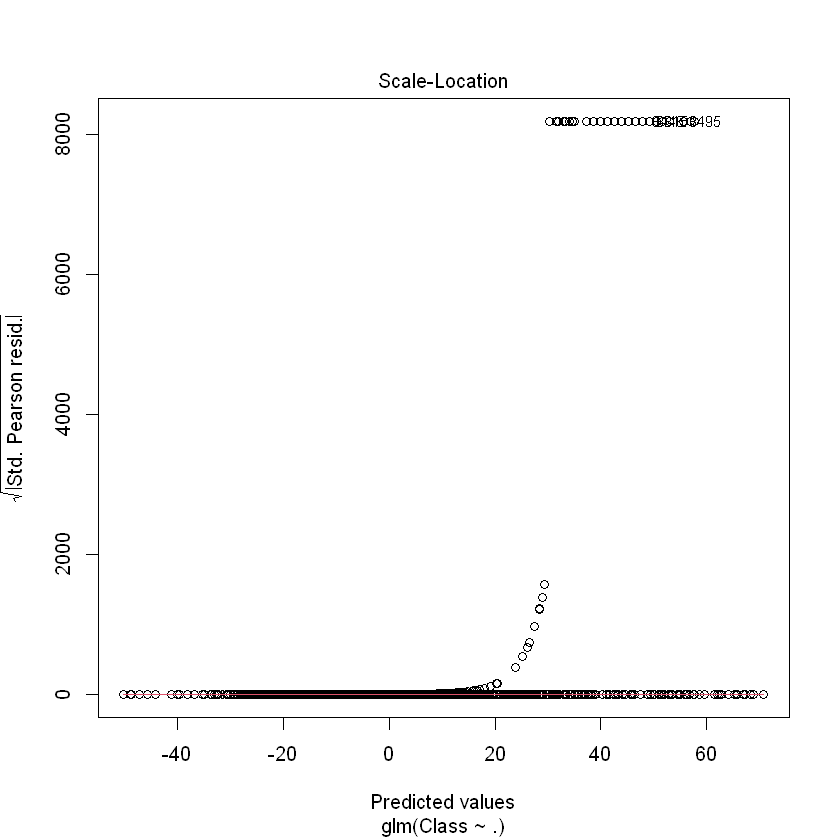

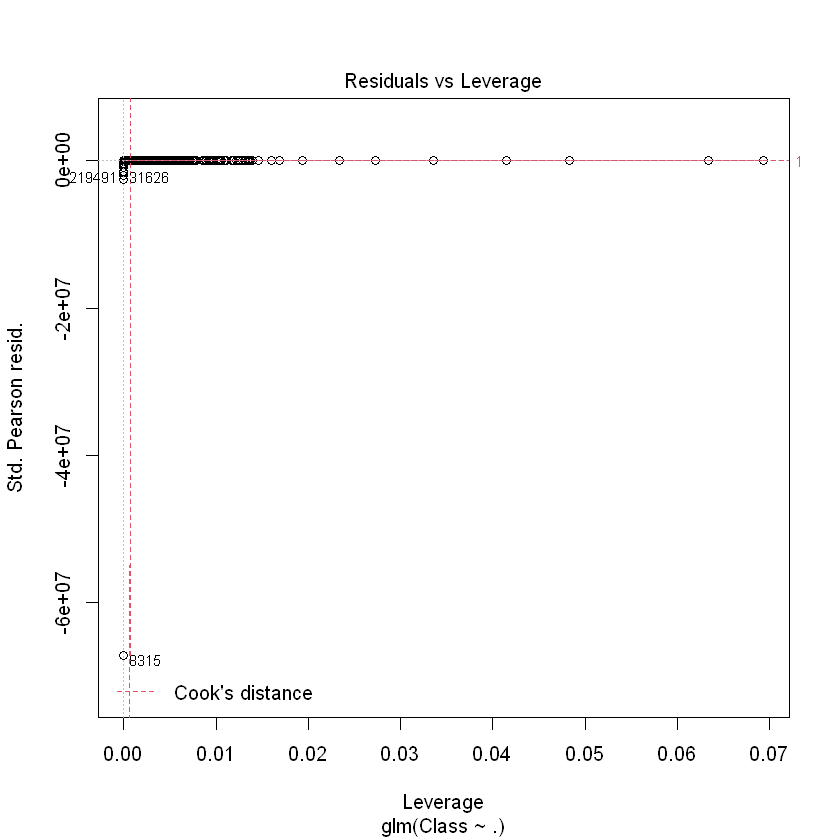

In [61]:
plot(logistic_model_up)

Area under the curve (AUC): 0.978

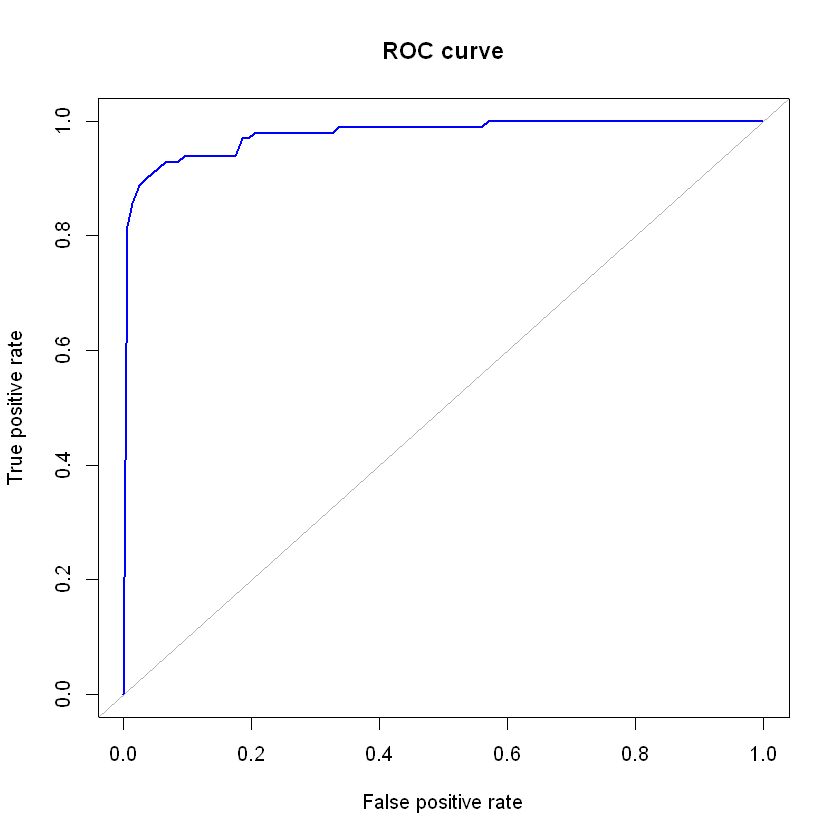

In [62]:
#Plotting the ROC-AUC Curve

logistic_predictions_up <- predict(logistic_model_up, test_data, type='response')
roc.curve(test_data$Class, logistic_predictions_up, plotit = TRUE, col = "blue")

#### Decision Tree Model

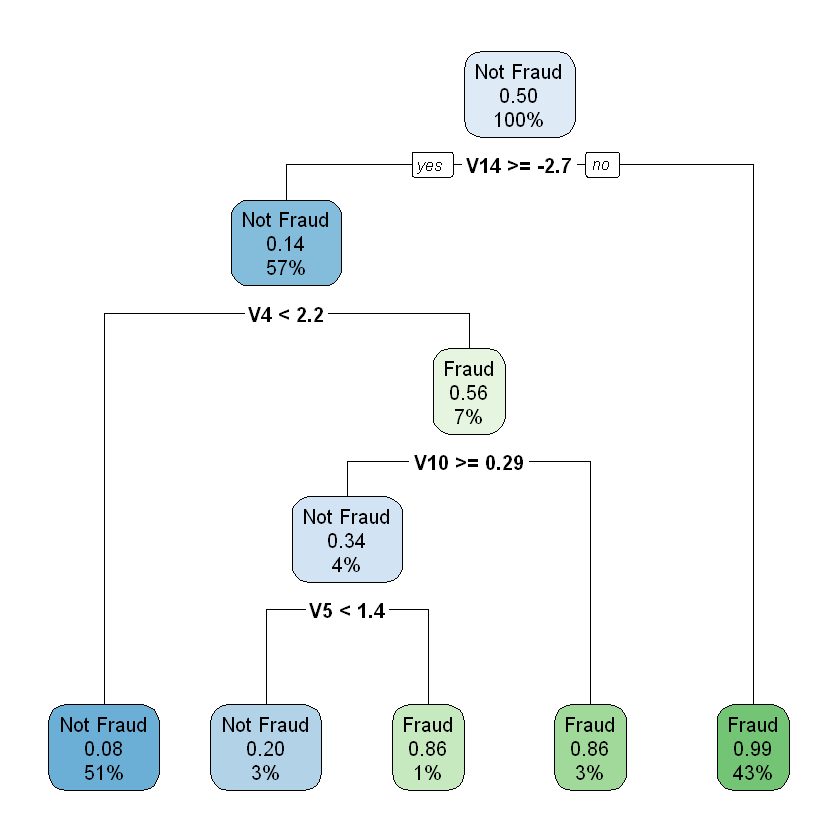

In [16]:
decisionTree_model <- rpart(Class ~ . , down_train_data, method = 'class')
predicted_val <- predict(decisionTree_model, down_train_data, type = 'class')
probability <- predict(decisionTree_model, down_train_data, type = 'prob')
rpart.plot(decisionTree_model)

Area under the curve (AUC): 0.967

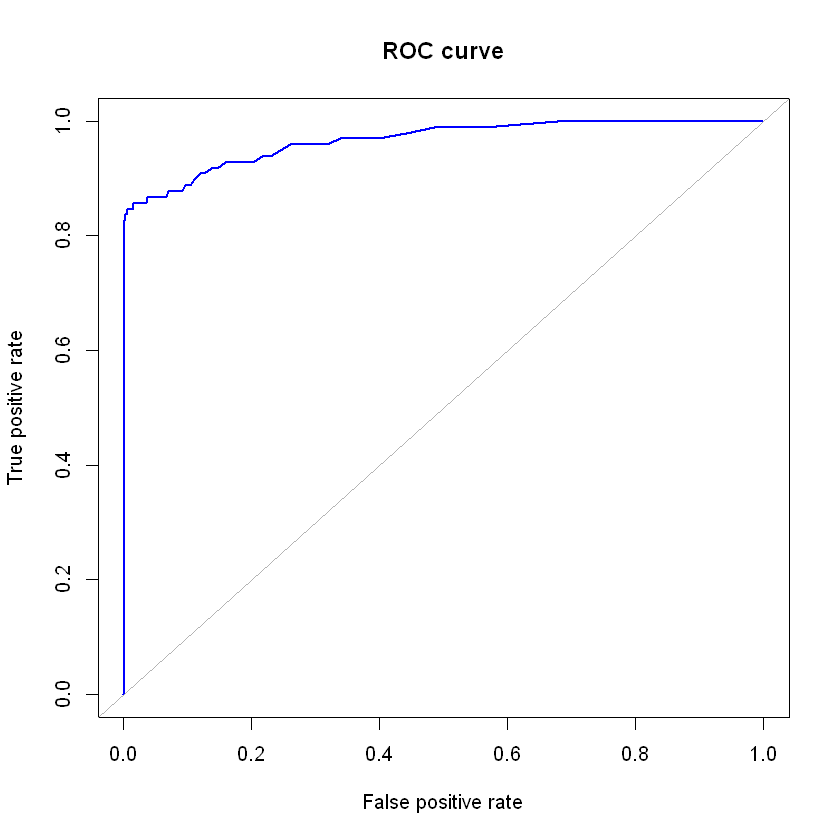

In [21]:
x = down_train_data[, -30]
y = down_train_data[,30]

rf_fit <- Rborist(x, y, ntree = 1000, minNode = 20, maxLeaf = 13)


rf_pred <- predict(rf_fit, test_data[,-30], ctgCensus = "prob")
prob <- rf_pred$prob

roc.curve(test_data$Class, prob[,2], plotit = TRUE, col = 'blue')

#### XGBoost Model

In [22]:
set.seed(40)

#Convert class labels from factor to numeric
labels <- down_train_data$Class
y <- recode(labels, 'Not Fraud' = 0, "Fraud" = 1)

# xgb fit
xgb_fit <- xgboost(data = data.matrix(down_train_data[,-30]), 
 label = y,
 eta = 0.1,
 gamma = 0.1,
 max_depth = 10, 
 nrounds = 300, 
 objective = "binary:logistic",
 colsample_bytree = 0.6,
 verbose = 0,
 nthread = 7
)

Area under the curve (AUC): 0.968

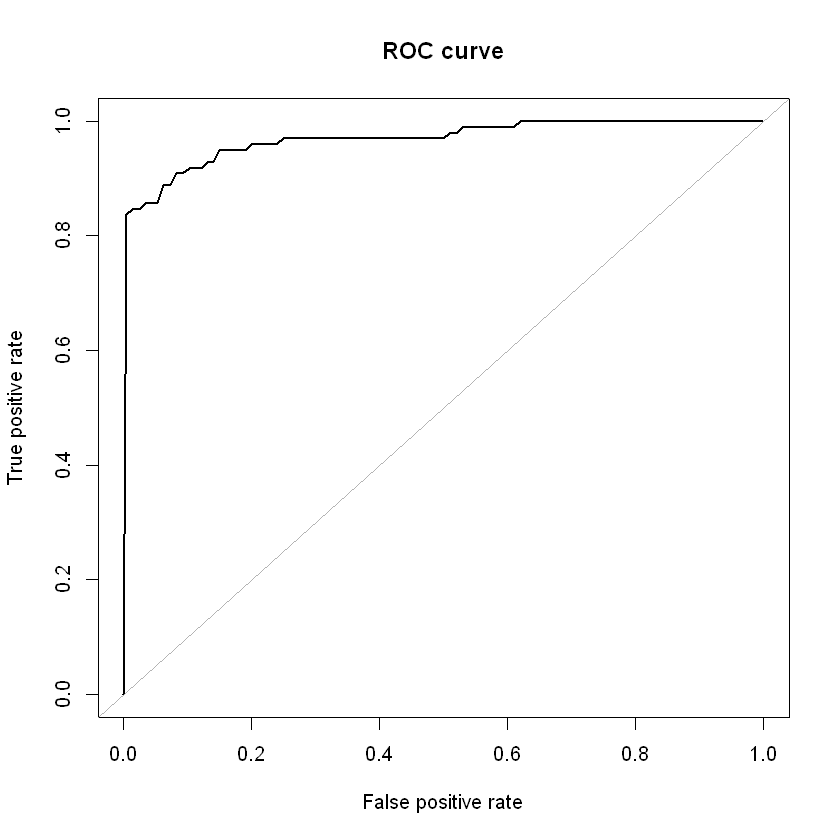

In [23]:
# XGBoost predictions
xgb_pred <- predict(xgb_fit, data.matrix(test_data[,-30]))
roc.curve(test_data$Class, xgb_pred, plotit = TRUE)